KLASIFIKASI CITRA HAMA PADA DAUN TANAMAN MANGGA
---
# Pretrain model yang digunakan :

1.   [Resnet-101](https://arxiv.org/abs/1512.03385)
2.   [DenseNet-201](https://arxiv.org/abs/1608.06993)

# Sumber Dataset :
Dataset hama daun mangga ini diambil dari penelitian sebelumnya yang dilakukan oleh Kusrini dan rekannya

Link download dataset : [download](https://data.mendeley.com/datasets/94jf97jzc8/1)

# Daftar Class :


1. Apoderus javanicus
2. Aulacaspis tubercularis
3. Ceroplastes rubens
4. Cisaberoptus kenyae
5. Dappula tertia
6. Dialeuropora decempuncta
7. Erosomyia sp
8. Icerya seychellarum
9. Ischnaspis longirostris
10. Mictis longicornis
11. Neomelicharia sparsa
12. Orthaga euadrusalis
13. Procontarinia matteiana
14. Procontarinia rubus
15. Valanga nigricornis
16. Normal





In [ ]:
# Impor library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import ResNet101, DenseNet201
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Mount Google Drive dan ekstrak dataset
from google.colab import drive
drive.mount('/content/drive')

import zipfile
zip_file = zipfile.ZipFile('/content/drive/MyDrive/Dataset/versi1.zip')
zip_file.extractall('/tmp/')

Mounted at /content/drive


In [ ]:
# Direktori dataset
train_dir = '/tmp/versi1/train'
val_dir = '/tmp/versi1/valid'
test_dir = '/tmp/versi1/test'

In [ ]:
# Praproses data
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False)

Found 46500 images belonging to 16 classes.
Found 103 images belonging to 16 classes.
Found 97 images belonging to 16 classes.


### **Model Resnet-101**



In [ ]:
# Model ResNet101
resnet_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_model.layers.pop()
resnet_model = Model(inputs=resnet_model.input, outputs=resnet_model.layers[-1].output)

num_classes = len(train_generator.class_indices)
model_resnet = Sequential([
    resnet_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

171446536/171446536 [==============================] - 5s 0us/step


In [ ]:
# Kompilasi model ResNet101
model_resnet.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Setup EarlyStopping, ModelCheckpoint, dan CSVLogger untuk ResNet101
early_stop_resnet = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max', restore_best_weights=True)
checkpoint_resnet = ModelCheckpoint('best_weights_resnet.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_logger_resnet = CSVLogger('training_log_resnet.csv')

In [ ]:
# Training model ResNet101 dengan callbacks
history_resnet = model_resnet.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[early_stop_resnet, checkpoint_resnet, csv_logger_resnet]
)

Epoch 1/50
1454/1454 [==============================] - ETA: 0s - loss: 3.3640 - accuracy: 0.9295
Epoch 1: val_accuracy improved from -inf to 0.73786, saving model to best_weights_resnet.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1454/1454 [==============================] - 347s 195ms/step - loss: 3.3640 - accuracy: 0.9295 - val_loss: 2.6572 - val_accuracy: 0.7379
Epoch 2/50
1454/1454 [==============================] - ETA: 0s - loss: 0.9232 - accuracy: 0.9809
Epoch 2: val_accuracy did not improve from 0.73786
1454/1454 [==============================] - 277s 190ms/step - loss: 0.9232 - accuracy: 0.9809 - val_loss: 1.8485 - val_accuracy: 0.6990
Epoch 3/50
1454/1454 [==============================] - ETA: 0s - loss: 0.2533 - accuracy: 0.9860
Epoch 3: val_accuracy did not improve from 0.73786
1454/1454 [==============================] - 277s 190ms/step - loss: 0.2533 - accuracy: 0.9860 - val_loss: 1.6133 - val_accuracy: 0.7379
Epoch 4/50
1454/1454 [==============================] - ETA: 0s - loss: 0.1127 - accuracy: 0.9883
Epoch 4: val_accuracy did not improve from 0.73786
1454/1454 [==============================] - 277s 190ms/step - loss: 0.1127 - accuracy: 0.9883 - val_loss: 1.4697 - val_accuracy: 0.7087
Epoch

In [ ]:
# Memuat bobot terbaik untuk evaluasi ResNet101
model_resnet.load_weights('best_weights_resnet.h5')

97/97 [==============================] - 1s 12ms/step
Results for ResNet101:
Accuracy: 80.41%
Precision: 83.88%
Recall: 83.09%
F1 Score: 81.77%


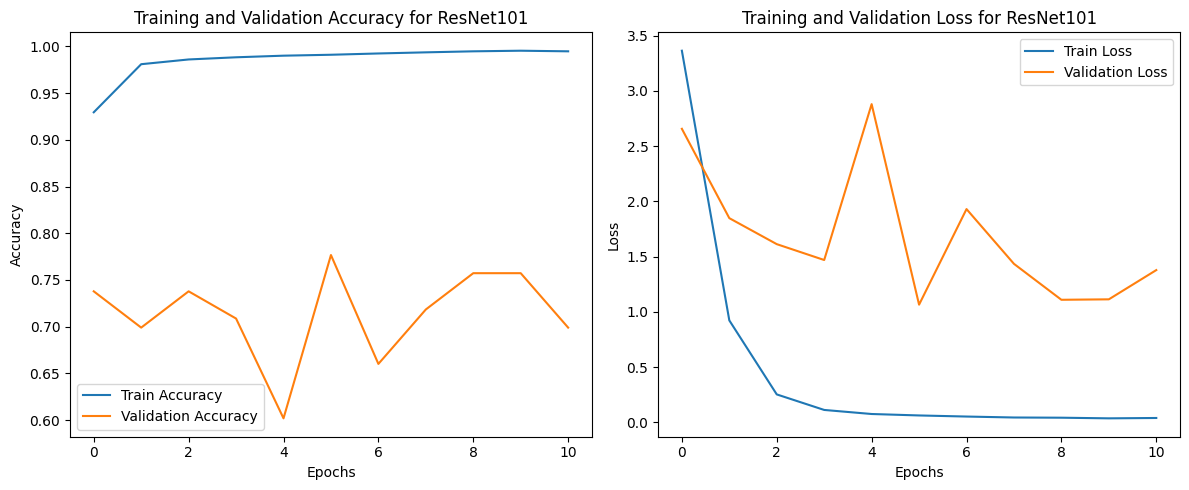

In [ ]:
# Evaluasi model ResNet101
y_true_resnet = test_generator.classes
y_pred_resnet = model_resnet.predict(test_generator)
y_pred_classes_resnet = np.argmax(y_pred_resnet, axis=1)

accuracy_resnet = accuracy_score(y_true_resnet, y_pred_classes_resnet) * 100
precision_resnet = (
    precision_score(y_true_resnet, y_pred_classes_resnet, average="macro", zero_division=1) * 100
)
recall_resnet = recall_score(y_true_resnet, y_pred_classes_resnet, average="macro") * 100
f1_resnet = f1_score(y_true_resnet, y_pred_classes_resnet, average="macro") * 100

print("Results for ResNet101:")
print(f"Accuracy: {accuracy_resnet:.2f}%")
print(f"Precision: {precision_resnet:.2f}%")
print(f"Recall: {recall_resnet:.2f}%")
print(f"F1 Score: {f1_resnet:.2f}%")

# Baca file log CSV untuk ResNet101
log_data_resnet = pd.read_csv('training_log_resnet.csv')

# Plot akurasi pelatihan dan validasi untuk ResNet101
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(log_data_resnet['accuracy'], label='Train Accuracy')
plt.plot(log_data_resnet['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for ResNet101')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss pelatihan dan validasi untuk ResNet101
plt.subplot(1, 2, 2)
plt.plot(log_data_resnet['loss'], label='Train Loss')
plt.plot(log_data_resnet['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for ResNet101')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### **Model DenseNet-201**



In [ ]:
# Model DenseNet201
densenet_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
densenet_model.layers.pop()
densenet_model = Model(inputs=densenet_model.input, outputs=densenet_model.layers[-1].output)

74836368/74836368 [==============================] - 3s 0us/step


In [ ]:
# Membuat model Sequential untuk DenseNet201
model_densenet = Sequential([
    densenet_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [ ]:
# Kompilasi model DenseNet201 dengan menggunakan 'learning_rate' bukan 'lr'
model_densenet.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Setup EarlyStopping, ModelCheckpoint, dan CSVLogger untuk DenseNet201
model_name_densenet = 'best_weights_densenet.h5'
early_stop_densenet = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max', restore_best_weights=True)
checkpoint_densenet = ModelCheckpoint(model_name_densenet, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_logger_densenet = CSVLogger('training_log_densenet.csv')

In [ ]:
# Training model DenseNet201 dengan callbacks
history_densenet = model_densenet.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[early_stop_densenet, checkpoint_densenet, csv_logger_densenet]
)

Epoch 1/50
1454/1454 [==============================] - ETA: 0s - loss: 2.0758 - accuracy: 0.9316
Epoch 1: val_accuracy improved from -inf to 0.79612, saving model to best_weights_densenet.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1454/1454 [==============================] - 405s 211ms/step - loss: 2.0758 - accuracy: 0.9316 - val_loss: 1.9413 - val_accuracy: 0.7961
Epoch 2/50
1454/1454 [==============================] - ETA: 0s - loss: 0.7212 - accuracy: 0.9869
Epoch 2: val_accuracy did not improve from 0.79612
1454/1454 [==============================] - 297s 204ms/step - loss: 0.7212 - accuracy: 0.9869 - val_loss: 1.4831 - val_accuracy: 0.7767
Epoch 3/50
1454/1454 [==============================] - ETA: 0s - loss: 0.2671 - accuracy: 0.9894
Epoch 3: val_accuracy did not improve from 0.79612
1454/1454 [==============================] - 297s 204ms/step - loss: 0.2671 - accuracy: 0.9894 - val_loss: 1.0882 - val_accuracy: 0.7573
Epoch 4/50
1454/1454 [==============================] - ETA: 0s - loss: 0.1136 - accuracy: 0.9911
Epoch 4: val_accuracy did not improve from 0.79612
1454/1454 [==============================] - 297s 204ms/step - loss: 0.1136 - accuracy: 0.9911 - val_loss: 1.6927 - val_accuracy: 0.6893
Epoch

In [ ]:
# Memuat bobot terbaik untuk evaluasi DenseNet201
model_densenet.load_weights(model_name_densenet)

97/97 [==============================] - 6s 17ms/step

Results for DenseNet201:
Accuracy: 77.32%
Precision: 79.80%
Recall: 79.64%
F1 Score: 76.71%


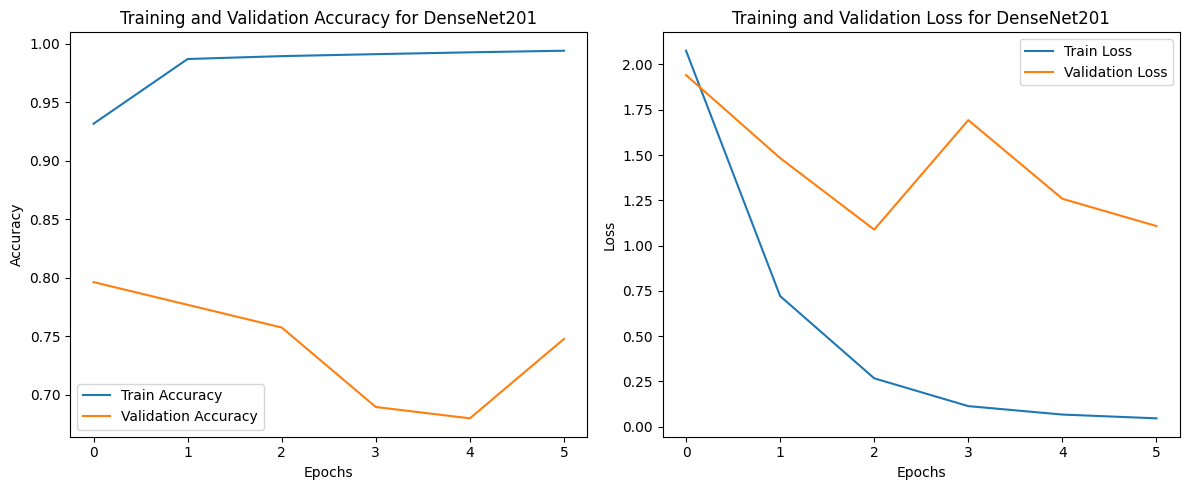

In [ ]:
# Evaluasi model DenseNet201
y_true_densenet = test_generator.classes
y_pred_densenet = model_densenet.predict(test_generator)
y_pred_classes_densenet = np.argmax(y_pred_densenet, axis=1)

accuracy_densenet = accuracy_score(y_true_densenet, y_pred_classes_densenet) * 100
precision_densenet = (
    precision_score(y_true_densenet, y_pred_classes_densenet, average="macro", zero_division=1) * 100
)
recall_densenet = recall_score(y_true_densenet, y_pred_classes_densenet, average="macro") * 100
f1_densenet = f1_score(y_true_densenet, y_pred_classes_densenet, average="macro") * 100

print("\nResults for DenseNet201:")
print(f"Accuracy: {accuracy_densenet:.2f}%")
print(f"Precision: {precision_densenet:.2f}%")
print(f"Recall: {recall_densenet:.2f}%")
print(f"F1 Score: {f1_densenet:.2f}%")

# Baca file log CSV untuk DenseNet201
log_data_densenet = pd.read_csv('training_log_densenet.csv')

# Plot akurasi pelatihan dan validasi untuk DenseNet201
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(log_data_densenet['accuracy'], label='Train Accuracy')
plt.plot(log_data_densenet['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for DenseNet201')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss pelatihan dan validasi untuk DenseNet201
plt.subplot(1, 2, 2)
plt.plot(log_data_densenet['loss'], label='Train Loss')
plt.plot(log_data_densenet['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for DenseNet201')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()